# CNN vs MobileNetV2 Classifier Comparison

## Imports and setup

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from src.__00__paths import docs_dir, figures_dir

cnn_report_path = docs_dir / "custom_CNN_classification_report.txt"  # CNN report
mobilenet_report_path = docs_dir / "mobilenet_classification_report.txt"  # MobileNet report

## Report Summary Method

In [10]:
def parse_classification_report(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()

    # Keep only the lines with class metrics
    lines = [line.strip() for line in lines if line.strip() and not line.startswith("Test Accuracy")]
    class_lines = [line for line in lines if line[0].isdigit()]

    rows = []
    for line in class_lines:
        parts = line.split()
        if len(parts) >= 5:
            class_id = int(parts[0])
            precision, recall, f1, support = map(float, parts[1:5])
            rows.append([class_id, precision, recall, f1, support])
    return pd.DataFrame(rows, columns=["Class", "Precision", "Recall", "F1-Score", "Support"])


cnn_df = parse_classification_report(cnn_report_path)
mobilenet_df = parse_classification_report(mobilenet_report_path)



## Compare Between CNN and MobileNet

Macro-Averaged Metrics:

       Model  Macro Precision  Macro Recall  Macro F1-Score
0        CNN           0.9498        0.9440          0.9430
1  MobileNet           0.5433        0.4793          0.4816


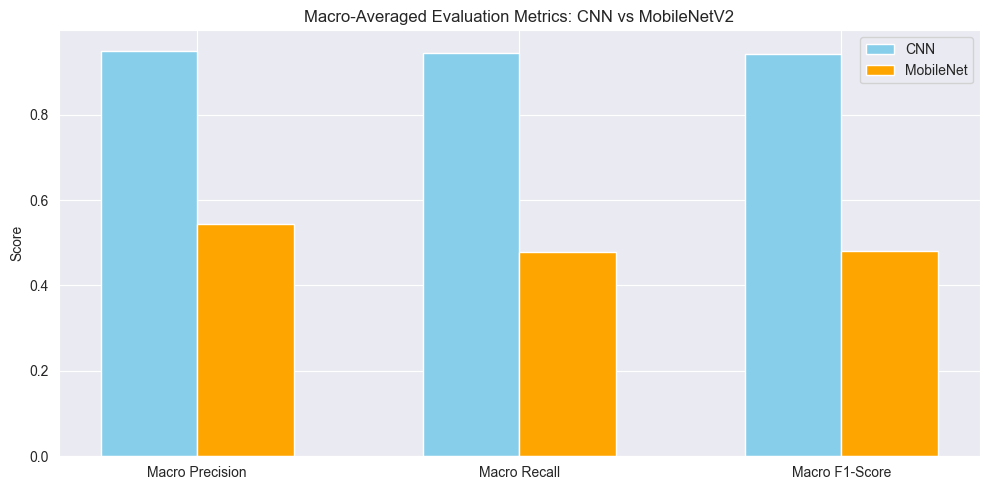

In [11]:
comparison_df = pd.DataFrame({
    "Model": ["CNN", "MobileNet"],
    "Macro Precision": [cnn_df["Precision"].mean(), mobilenet_df["Precision"].mean()],
    "Macro Recall": [cnn_df["Recall"].mean(), mobilenet_df["Recall"].mean()],
    "Macro F1-Score": [cnn_df["F1-Score"].mean(), mobilenet_df["F1-Score"].mean()],
})

print("Macro-Averaged Metrics:\n")
print(comparison_df.round(4))

plt.figure(figsize=(10, 5))
metrics = ["Macro Precision", "Macro Recall", "Macro F1-Score"]

for i, metric in enumerate(metrics):
    plt.bar(i - 0.15, comparison_df.iloc[0][metric], width=0.3, label="CNN" if i == 0 else "", color="skyblue")
    plt.bar(i + 0.15, comparison_df.iloc[1][metric], width=0.3, label="MobileNet" if i == 0 else "", color="orange")

plt.xticks(range(len(metrics)), metrics)
plt.title("Macro-Averaged Evaluation Metrics: CNN vs MobileNetV2")
plt.ylabel("Score")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig(figures_dir / "comparison_CNN_MobileNet.png", dpi=300)
plt.show()